In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_excel('./preprocessed_data.xlsx')

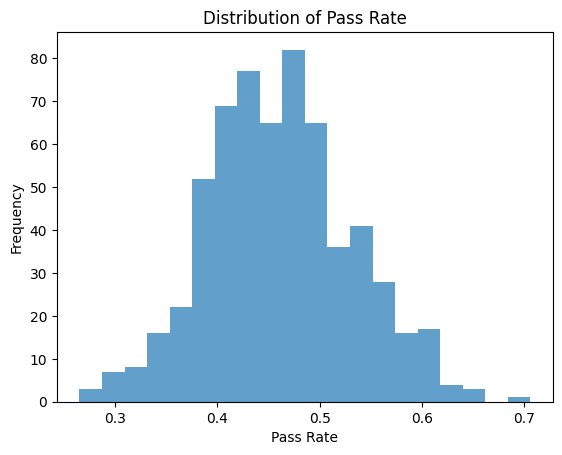

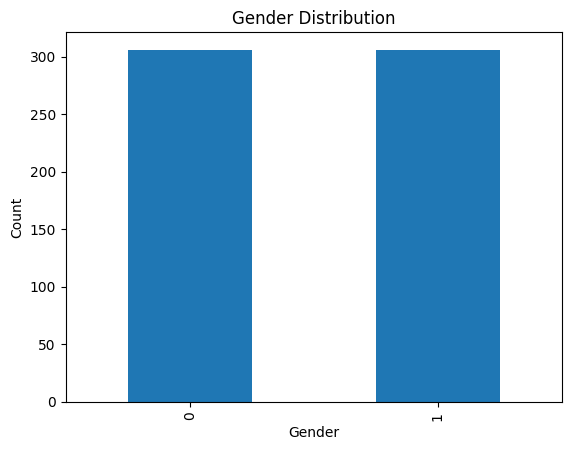

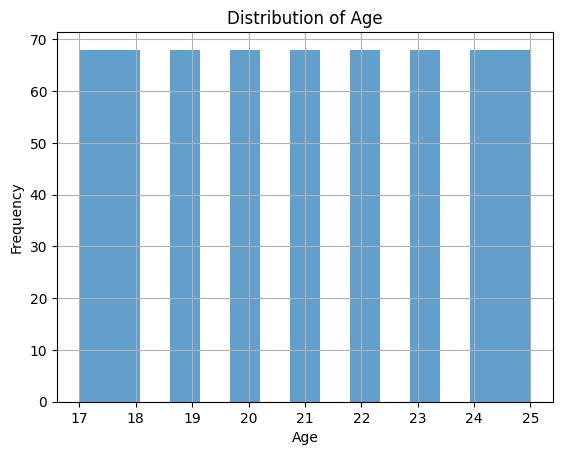

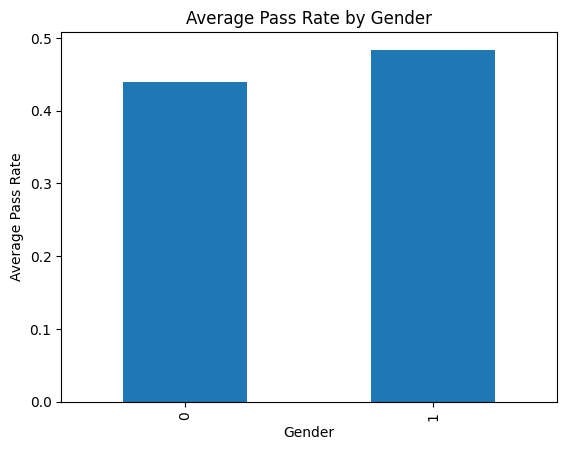

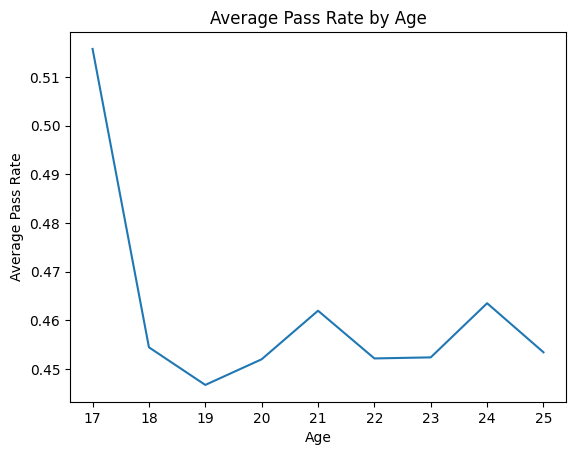

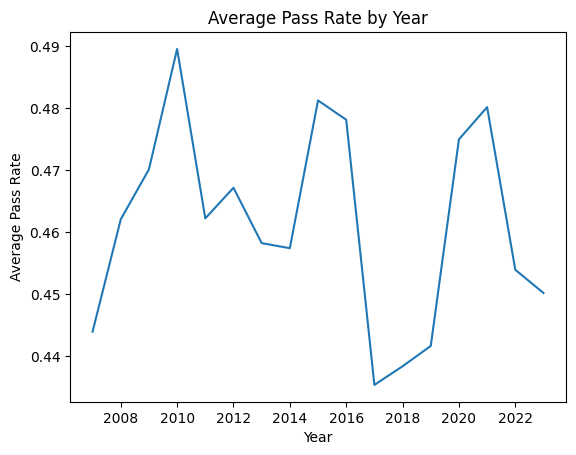

In [8]:
# 1. Distribution of pass rate by location
plt.hist(df['Pass rate'], bins=20, alpha=0.7, label='Pass Rate')
plt.xlabel('Pass Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Pass Rate')
plt.show()

# 2. Distribution of gender by location
gender_counts = df.groupby('Gender').size()
gender_counts.plot(kind='bar', title='Gender Distribution', ylabel='Count', xlabel='Gender')
plt.show()

# 3. Distribution of age by location
df['Age'].hist(bins=15, alpha=0.7)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 4. Average pass rate by gender
avg_pass_gender = df.groupby('Gender')['Pass rate'].mean()
avg_pass_gender.plot(kind='bar', title='Average Pass Rate by Gender', ylabel='Average Pass Rate', xlabel='Gender')
plt.show()

# 5. Average pass rate by age
avg_pass_age = df.groupby('Age')['Pass rate'].mean()
avg_pass_age.plot(title='Average Pass Rate by Age', ylabel='Average Pass Rate', xlabel='Age')
plt.show()

# 6. Average pass rate by year
avg_pass_year = df.groupby('Year')['Pass rate'].mean()
avg_pass_year.plot(title='Average Pass Rate by Year', ylabel='Average Pass Rate', xlabel='Year')
plt.show()


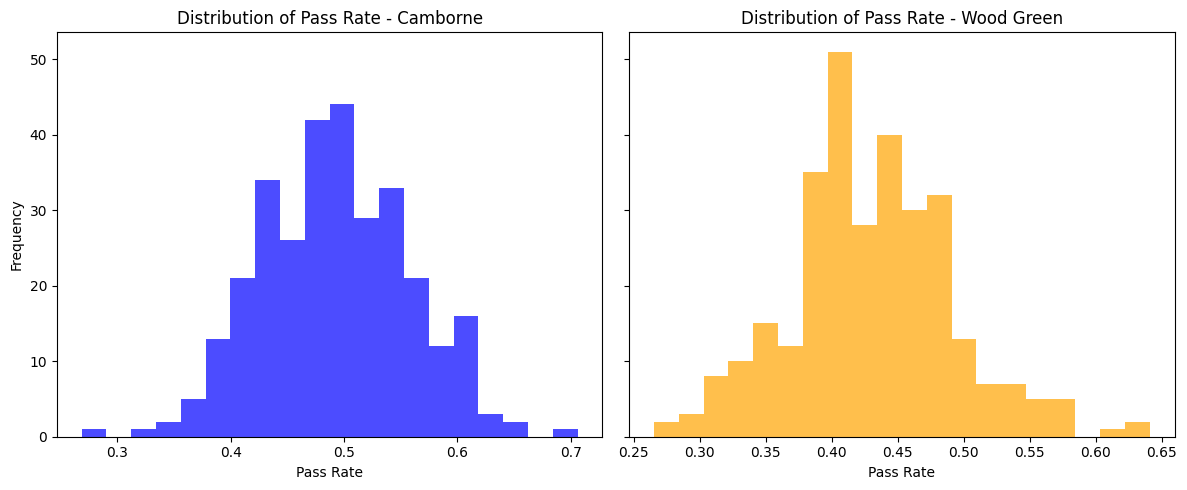

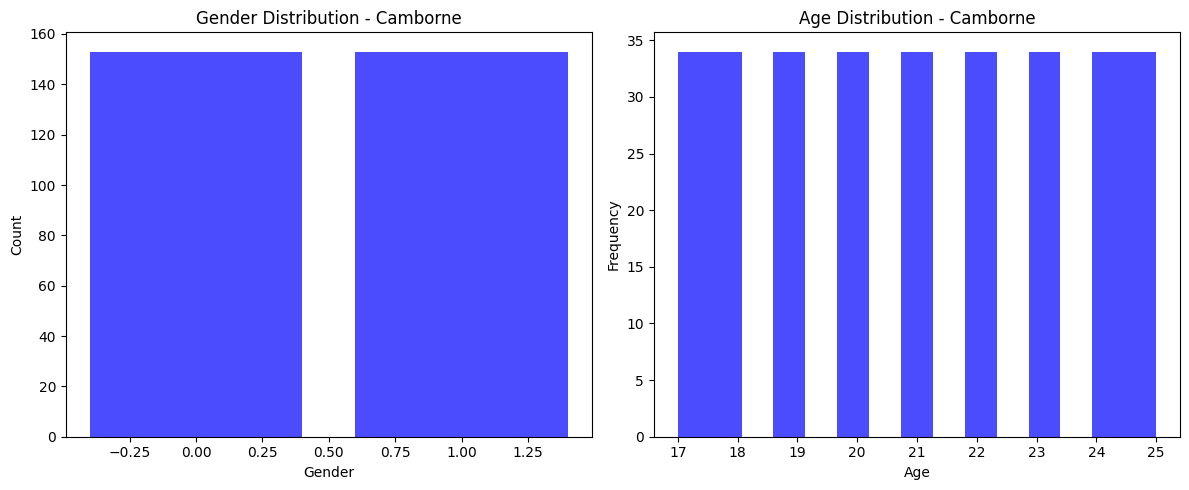

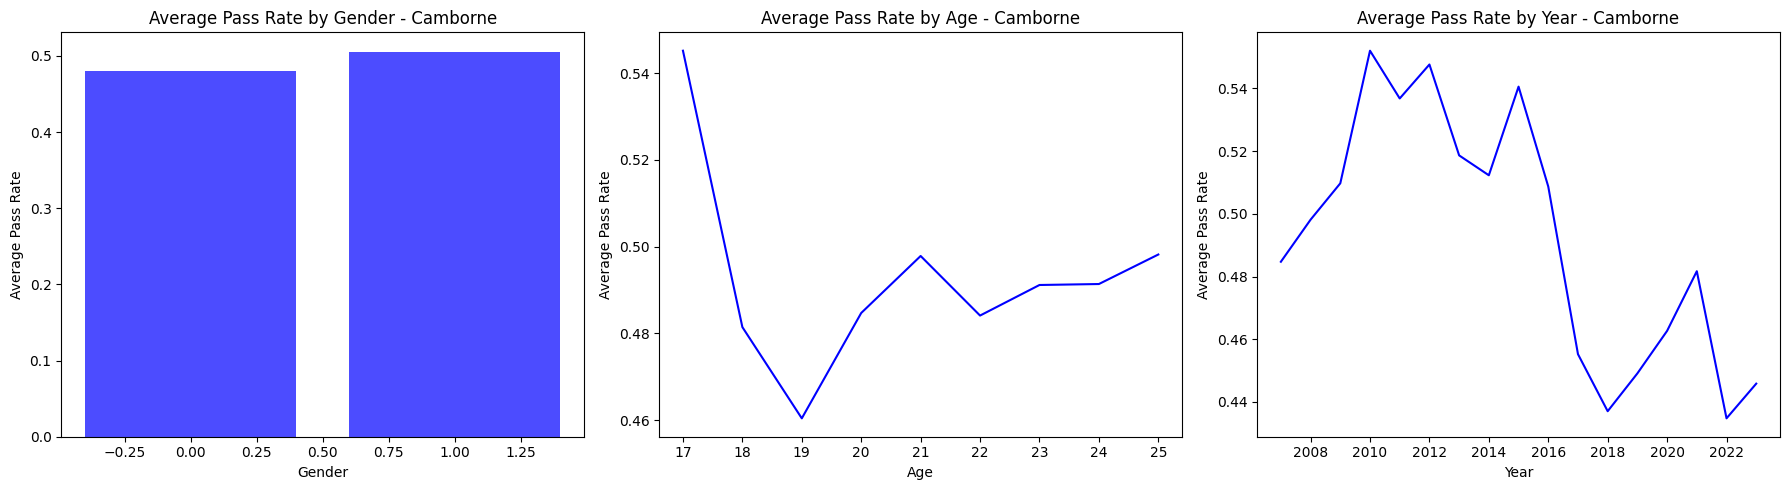

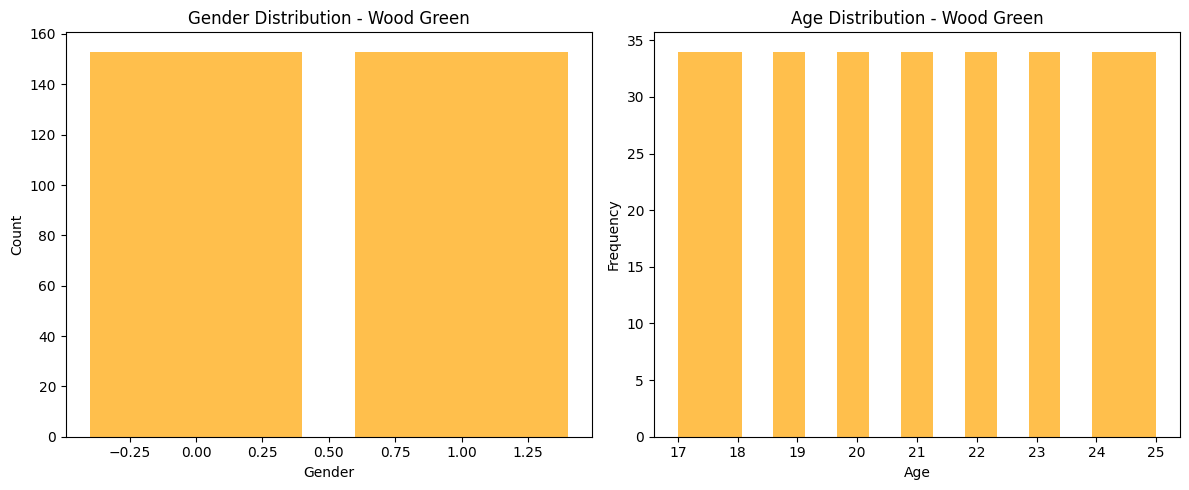

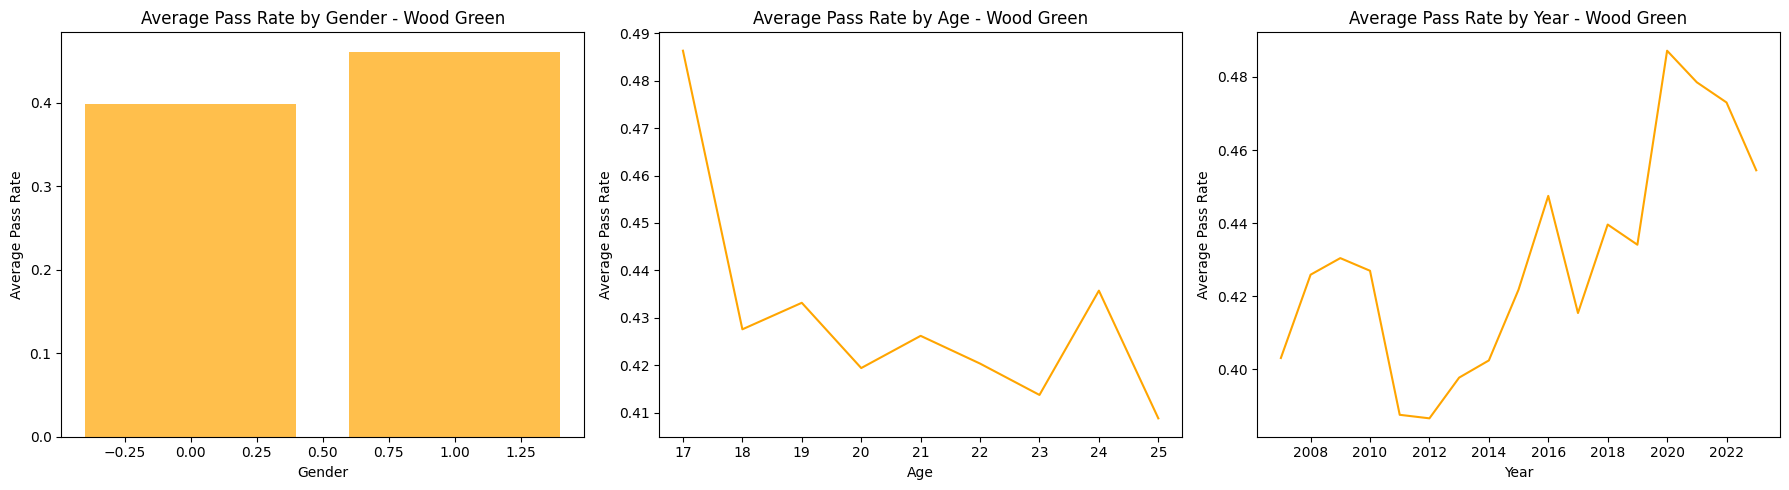

In [ ]:
import matplotlib.pyplot as plt

# Separate data by location
camborne_data = df[df['Location'] == 1]
wood_green_data = df[df['Location'] == 0]

# Define colors for each location
location_colors = {
    "Camborne": "blue",
    "Wood Green": "orange"
}

# 1. Distribution of Pass Rate in two locations (two parallel subplots)
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
axes[0].hist(camborne_data['Pass rate'], bins=20, alpha=0.7, color="blue", label="Camborne")
axes[0].set_title("Distribution of Pass Rate - Camborne")
axes[0].set_xlabel("Pass Rate")
axes[0].set_ylabel("Frequency")

axes[1].hist(wood_green_data['Pass rate'], bins=20, alpha=0.7, color="orange", label="Wood Green")
axes[1].set_title("Distribution of Pass Rate - Wood Green")
axes[1].set_xlabel("Pass Rate")

plt.tight_layout()
plt.show()

# Function to visualize data for a specific location
def visualize_location_based_data(data, location_name):
    color = location_colors.get(location_name, "gray")  
    # 2. Gender and Age Distributions (two parallel subplots)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Gender Distribution
    gender_counts = data['Gender'].value_counts()
    axes[0].bar(gender_counts.index, gender_counts.values, color=color, alpha=0.7)
    axes[0].set_title(f"Gender Distribution - {location_name}")
    axes[0].set_xlabel("Gender")
    axes[0].set_ylabel("Count")
    
    # Age Distribution
    axes[1].hist(data['Age'], bins=15, alpha=0.7, color=color)
    axes[1].set_title(f"Age Distribution - {location_name}")
    axes[1].set_xlabel("Age")
    axes[1].set_ylabel("Frequency")
    
    plt.tight_layout()
    plt.show()
    
    # 3. Average Pass Rate by Gender, Age, and Year (three parallel subplots)
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Average Pass Rate by Gender
    avg_pass_gender = data.groupby('Gender')['Pass rate'].mean()
    axes[0].bar(avg_pass_gender.index, avg_pass_gender.values, color=color, alpha=0.7)
    axes[0].set_title(f"Average Pass Rate by Gender - {location_name}")
    axes[0].set_xlabel("Gender")
    axes[0].set_ylabel("Average Pass Rate")
    
    # Average Pass Rate by Age
    avg_pass_age = data.groupby('Age')['Pass rate'].mean()
    axes[1].plot(avg_pass_age.index, avg_pass_age.values, color=color)
    axes[1].set_title(f"Average Pass Rate by Age - {location_name}")
    axes[1].set_xlabel("Age")
    axes[1].set_ylabel("Average Pass Rate")
    
    # Average Pass Rate by Year
    avg_pass_year = data.groupby('Year')['Pass rate'].mean()
    axes[2].plot(avg_pass_year.index, avg_pass_year.values, color=color)
    axes[2].set_title(f"Average Pass Rate by Year - {location_name}")
    axes[2].set_xlabel("Year")
    axes[2].set_ylabel("Average Pass Rate")
    
    plt.tight_layout()
    plt.show()

# Visualize data for Camborne
visualize_location_based_data(camborne_data, "Camborne")

# Visualize data for Wood Green
visualize_location_based_data(wood_green_data, "Wood Green")
